In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [153]:
def parse_srim_data(path):
    columns = ['energy_unit', 'dE/dx_elec', 'dE/dx_nucl', 'projected_range', 'projected_range_unit', 'longitudinal_straggling', 'longitudinal_straggling_unit', 'lateral_straggling', 'lateral_straggling_unit']
    data = pd.read_csv(path, sep='\s+', skiprows=24, names=columns, engine='python')

    lowlim = np.where(data.index == 'Multiply')[0][0] - 1
    data = data.iloc[:lowlim]

    data['energy_unit'] = data['energy_unit'].astype(str).str.extract(r'([a-zA-Z]+)', expand=False)
    data['energy'] = pd.to_numeric(data.index)
    column_numeric = ['dE/dx_elec', 'dE/dx_nucl', 'projected_range', 'longitudinal_straggling', 'lateral_straggling']
    data.index = pd.to_numeric(data.index, errors='coerce')
    data[column_numeric] = data[column_numeric].apply(pd.to_numeric, errors='coerce')
    mask_unit = data['energy_unit'] == 'MeV'
    data.loc[mask_unit, 'energy'] = data.loc[mask_unit, 'energy'] * 1e3

    mask_unit_range = data['projected_range_unit'] == 'mm'
    data.loc[mask_unit_range, 'projected_range'] = data.loc[mask_unit_range, 'projected_range'] * 1e3

    mask_unit_range = data['projected_range_unit'] == 'A'
    data.loc[mask_unit_range, 'projected_range'] = data.loc[mask_unit_range, 'projected_range'] * 1e-4
    
    return data

In [ ]:
pathra = '/Users/pabloherrero/sabat/RaTagging/scope_data/SRIM_output/Radium in Xenon (gas).txt'


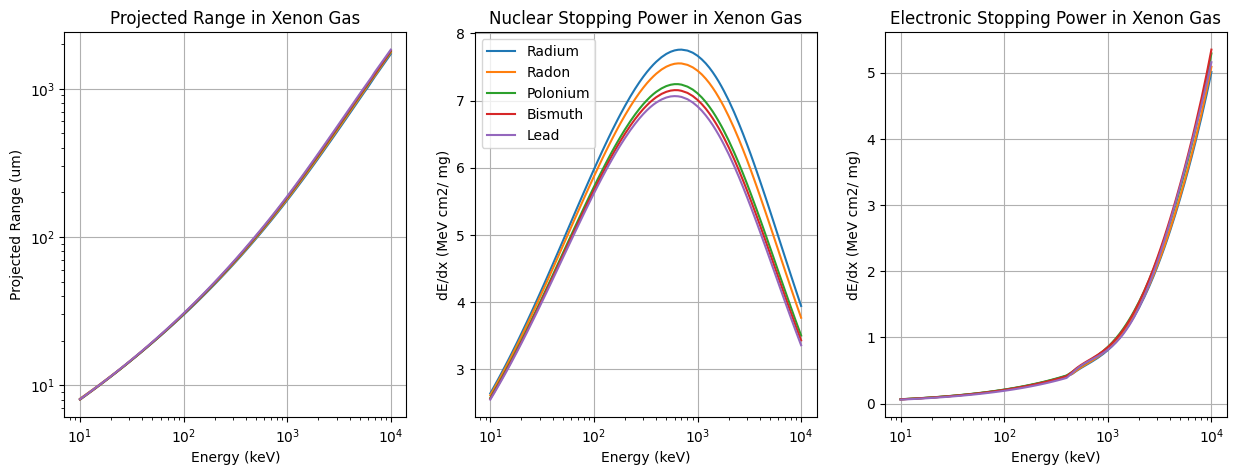

In [155]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
elements = ['Radium', 'Radon', 'Polonium', 'Bismuth', 'Lead']
srim_data = {}
for element in elements:
    path = f'/Users/pabloherrero/sabat/RaTagging/scope_data/SRIM_output/{element} in Xenon (gas).txt'
    srim_data[element] = parse_srim_data(path)
    data = srim_data[element]
    ax[0].plot(data['energy'], data['projected_range'], '-', label=element)
    ax[0].set(xlabel='Energy (keV)', ylabel='Projected Range (um)',  xscale='log',  yscale='log', title='Projected Range in Xenon Gas')

    ax[1].plot(data['energy'], data['dE/dx_nucl'], '-', label=element)
    ax[1].set(xlabel='Energy (keV)', ylabel='dE/dx (MeV cm2/ mg)', xscale='log', title='Nuclear Stopping Power in Xenon Gas')
    ax[1].legend()

    ax[2].plot(data['energy'], data['dE/dx_elec'], '-', label=element)
    ax[2].set(xlabel='Energy (keV)', ylabel='dE/dx (MeV cm2/ mg)', xscale='log', title='Electronic Stopping Power in Xenon Gas')

for a in ax:
    a.grid()

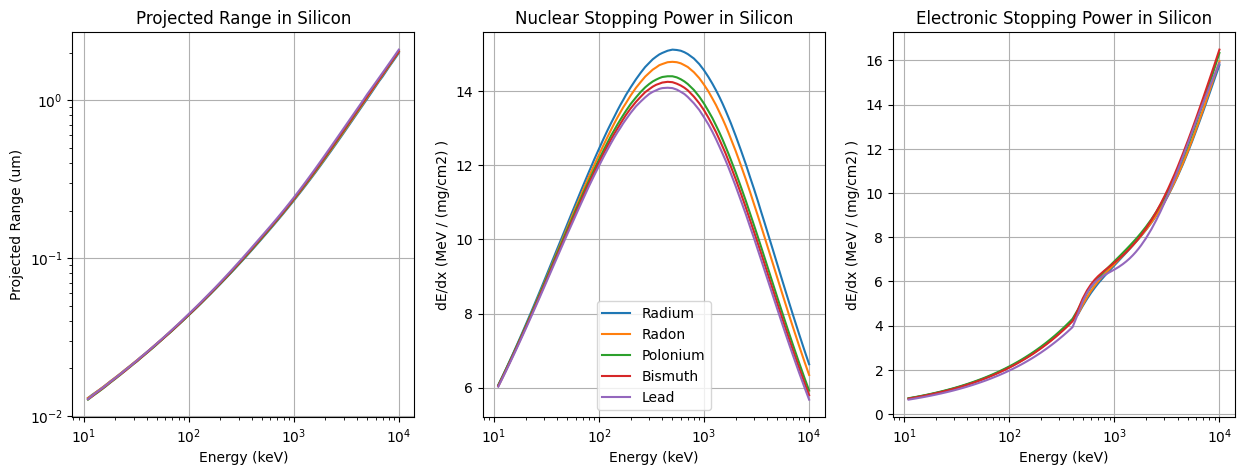

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
elements = ['Radium', 'Radon', 'Polonium', 'Bismuth', 'Lead']
srim_data = {}
for element in elements:
    path = f'/Users/pabloherrero/sabat/RaTagging/scope_data/SRIM_output/{element} in Silicon.txt'
    srim_data[element] = parse_srim_data(path)
    data = srim_data[element]
    ax[0].plot(data['energy'], data['projected_range'], '-', label=element)
    ax[0].set(xlabel='Energy (keV)', ylabel='Projected Range (um)',  xscale='log',  yscale='log', title='Projected Range in Silicon')

    ax[1].plot(data['energy'], data['dE/dx_nucl'], '-', label=element)
    ax[1].set(xlabel='Energy (keV)', ylabel='dE/dx (MeV cm2/ mg)', xscale='log', title='Nuclear Stopping Power in Silicon')
    ax[1].legend()

    ax[2].plot(data['energy'], data['dE/dx_elec'], '-', label=element)
    ax[2].set(xlabel='Energy (keV)', ylabel='dE/dx (MeV cm2/ mg)', xscale='log', title='Electronic Stopping Power in Silicon')

for a in ax:
    a.grid()